# Coronavirus
---
Based on a dataset of over 100,000 instances and different variables, this is an on-going project in which I am evaluating the following questions:

1. How is the spread of the coronavirus throughout the world ? 
    Which continent had the highest number of cases and deaths ?
2. Is there a correlation between the wealth of a nation and the Coronavirus cases? Or a correlation between population density and the Coronavirus cases?    
3. What is the mean cases between the continents ?
4. Which countries are now the top 10 with the highest number of cases ? What is the mean cases for each of the top 10 countries ? 
5. Can we say that some countries have the second, third ... wave ?
6. Is there a difference in the spread of Coronavirus cases if the country is an isle ?
7. Is there any country without cases of coronavirus ?
8. Is there any country that reached 1 Million of cases ? How many days to reach it ?

**Steps:**
1. Data exploration and preparation
2. Data extraction
3. Data Cleansing
4. Descriptive Statistic
5. Data Visualization
6. Report
7. Conclusion


# Step 1 - Data exploration and preparation
Exploring the internet searching for information about the spread of coronavirus, it was selected the following sources:
1. https://covid.ourworldindata.org/data/owid-covid-data.csv 
Max Roser, Hannah Ritchie, Esteban Ortiz-Ospina and Joe Hasell (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/coronavirus'
2. https://www.findlatitudeandlongitude.com/
3. https://www.worldometers.info/geography/7-continents/
4. https://en.wikipedia.org/wiki/List_of_island_countries

The information(data) will be created in differents formats, only to practice on differents plataforms like Excel, Python, SQL.

The information with the daily numbers of cases and deaths was taken from the source on item 1.

The information of the countries as latitude, longitude, if the country is an isle, population, gdp per capita, life exepctancy were taken from the source on items 1,2,3 and 4.

# Step 2 - Data extraction
In this step the data was extracted from the source mentioned on Step 1.

It will be created some df to check the columns that we need and on the next step we will clean and organize some files.
The list of countries was taken from source described on item 3.

In [174]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.date_dayfirst = True

In [175]:
# reading the file with the information about coronavirus direct from the website mentioned above on item 1
df_virus = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv",
                       usecols=['iso_code','date','new_cases','new_deaths','population','population_density','life_expectancy','human_development_index','gdp_per_capita'],)
# take the date from the file to show to user the last date of the update
update = df_virus['date'].max()
print(f'Last Update: {update}')

Last Update: 2021-04-09


In [176]:
# read the file created manually on excel using data from item 2,3 and 4(countries, continent, latitude, longitude, isle)
# Some countries names did not have pattern, so I check and correct them
df_country = pd.read_excel("Files/country_gps.xlsx")

# Step 3 - Data cleansing
In this step we will drop/rename some columns and rows that we will not use and
merge some information that is related to the specific countries. 
For example: move population, life expectancy... from virus table to country table.
Drop the rows that has totalization like OWID_WRL.
Some countries name are differents like USA/United States, UK/United Kingdom... In these cases the names were corrected checking the iso_code.

After cleansing we will created two cleaned files in excel format.
- virus.xlsx 
- country.xlsx

In [148]:
df_country.tail()

,iso_code,location,latitude,longitude,continent,isle
231,ESH,Western Sahara,24.22,-12.89,Africa,N
232,YEM,Yemen,15.55,48.52,Asia,N
233,ZMB,Zambia,-13.13,27.85,Africa,N
234,ZWE,Zimbabwe,-19.02,29.15,Africa,N
235,KOS,Kosovo,42.60,20.90,Europe,N


In [173]:
df_virus.tail()

,iso_code,date,new_cases,new_deaths,population,population_density,gdp_per_capita,life_expectancy,human_development_index
80317,ZWE,2021-04-04,12.00,1.00,"14,862,927.00",42.73,"1,899.78",61.49,0.57
80318,ZWE,2021-04-05,11.00,0.00,"14,862,927.00",42.73,"1,899.78",61.49,0.57
80319,ZWE,2021-04-06,32.00,6.00,"14,862,927.00",42.73,"1,899.78",61.49,0.57
80320,ZWE,2021-04-07,18.00,0.00,"14,862,927.00",42.73,"1,899.78",61.49,0.57
80321,ZWE,2021-04-08,68.00,1.00,"14,862,927.00",42.73,"1,899.78",61.49,0.57


In [177]:
# drop all rows that column iso_code is null/NaN
df_virus.dropna(subset=['iso_code'],inplace=True)

# drop all rows that iso_code is OWID_WRL(World)
df_virus.drop(df_virus[df_virus['iso_code'] =='OWID_WRL'].index, inplace=True)

df_virus.replace('OWID_KOS','KOS',inplace=True)

In [178]:
# move the information from virus to country as population, density, gdp, life expectancy...
df_country = pd.merge(df_country,df_virus[['iso_code','population','population_density','gdp_per_capita','life_expectancy','human_development_index']][df_virus['date']== '2020-12-31'],how='left',on='iso_code')
df_country.head()

,iso_code,location,latitude,longitude,continent,isle,population,population_density,gdp_per_capita,life_expectancy,human_development_index
0,AFG,Afghanistan,33.94,67.71,Asia,N,"38,928,341.00",54.42,"1,803.99",64.83,0.51
1,ALB,Albania,41.15,20.17,Europe,N,"2,877,800.00",104.87,"11,803.43",78.57,0.80
2,DZA,Algeria,28.03,1.66,Africa,N,"43,851,043.00",17.35,"13,913.84",76.88,0.75
3,ASM,American Samoa,-14.27,-170.13,Oceania,Y,nan,nan,nan,nan,nan
4,AND,Andorra,42.55,1.60,Europe,N,"77,265.00",163.75,nan,83.73,0.87


In [179]:
# As the name of countries does NOT match between the 2 files from the different sources
# I decided to get the name from the excel file and insert the columns location and continent on df_virus
df_virus = pd.merge(df_virus,df_country[['iso_code','location','continent']],on='iso_code',how='inner')

# drop the columns that are copied into the country file(above)
df_virus.drop(['population','population_density','gdp_per_capita','life_expectancy','human_development_index'],axis=1,inplace=True)

# summarize the cases and deaths per country and merge into df_country
df_virus_groupby_country = df_virus[['new_cases','new_deaths']].groupby(df_virus['location']).sum()
df_virus_groupby_country.reset_index(inplace=True)
df_country = df_country.merge(df_virus_groupby_country,how='left', on='location')
df_country.tail()

,iso_code,location,latitude,longitude,continent,isle,population,population_density,gdp_per_capita,life_expectancy,human_development_index,new_cases,new_deaths
231,ESH,Western Sahara,24.22,-12.89,Africa,N,nan,nan,nan,nan,nan,nan,nan
232,YEM,Yemen,15.55,48.52,Asia,N,"29,825,968.00",53.51,"1,479.15",66.12,0.47,"5,133.00","1,004.00"
233,ZMB,Zambia,-13.13,27.85,Africa,N,"18,383,956.00",23.00,"3,689.25",63.89,0.58,"89,592.00","1,225.00"
234,ZWE,Zimbabwe,-19.02,29.15,Africa,N,"14,862,927.00",42.73,"1,899.78",61.49,0.57,"37,052.00","1,532.00"
235,KOS,Kosovo,42.60,20.90,Europe,N,"1,932,774.00",168.16,"9,795.83",nan,nan,"95,886.00","1,968.00"


### Checking the total of countries in each dataframe

In [180]:
# checking the total of countries
print(f"Total of Countries in the World                           : {len(df_country)}")
print(f"Total of Countries infected by Coronavirus(ourworldindata): {len(df_virus['iso_code'].unique())}")

Total of Countries in the World                           : 236
Total of Countries infected by Coronavirus(ourworldindata): 203


### Create excel files with cleaned data 

In [181]:
# create a excel file with daily cases and deaths per date(only information related to coronavirus)
df_virus.to_excel("Files/virus.xlsx",index=False)
print(f"File virus.xlsx created.")

File virus.xlsx created.


In [182]:
# create a excel file with countries informations
df_country.to_excel("Files/country.xlsx",index=False)
print(f"File country.xlsx created.")

File country.xlsx created.


# Step 4 - Descriptive Statistic
In this step we can check some basic statitisc data

In [183]:
df_virus.shape

(76193, 6)

In [184]:
df_country.shape

(236, 13)

In [185]:
df_virus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76193 entries, 0 to 76192
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iso_code    76193 non-null  object 
 1   date        76193 non-null  object 
 2   new_cases   74779 non-null  float64
 3   new_deaths  65476 non-null  float64
 4   location    76193 non-null  object 
 5   continent   76193 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.1+ MB


In [186]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 236 non-null    object 
 1   location                 236 non-null    object 
 2   latitude                 236 non-null    float64
 3   longitude                236 non-null    float64
 4   continent                236 non-null    object 
 5   isle                     236 non-null    object 
 6   population               191 non-null    float64
 7   population_density       187 non-null    float64
 8   gdp_per_capita           183 non-null    float64
 9   life_expectancy          190 non-null    float64
 10  human_development_index  184 non-null    float64
 11  new_cases                203 non-null    float64
 12  new_deaths               203 non-null    float64
dtypes: float64(9), object(4)
memory usage: 25.8+ KB


In [187]:
df_virus.describe()

,new_cases,new_deaths
count,"74,779.00","65,476.00"
mean,"1,780.16",44.32
std,"9,192.39",190.70
min,"-74,347.00","-1,918.00"
25%,2.00,0.00
50%,56.00,1.00
75%,595.00,13.00
max,"300,295.00","4,476.00"


In [188]:
df_country.describe()

,latitude,longitude,population,population_density,gdp_per_capita,life_expectancy,human_development_index,new_cases,new_deaths
count,236.00,236.00,191.00,187.00,183.00,190.00,184.00,203.00,203.00
mean,18.01,10.75,"40,611,850.30",341.58,"18,704.24",72.96,0.72,"655,757.79","14,294.96"
std,24.29,73.80,"148,970,333.95","1,608.19","19,698.16",7.63,0.15,"2,618,571.19","52,390.57"
min,-51.80,-177.16,809.00,1.98,661.24,53.28,0.39,0.00,0.00
25%,3.93,-56.09,"2,183,990.00",36.07,"4,025.41",67.31,0.60,"5,267.50",82.00
50%,17.34,16.53,"9,006,400.00",82.81,"11,840.85",74.38,0.74,"61,731.00",788.00
75%,38.97,46.37,"29,481,388.00",208.97,"26,792.86",78.51,0.84,"286,085.50","5,886.00"
max,71.71,179.41,"1,439,323,774.00","19,347.50","116,935.60",86.75,0.96,"31,002,263.00","560,116.00"


When we check some basic values we can noticed some negative values. 
Searching for more information we can find that the negative values was update, according to https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200921-weekly-epi-update-6.pdf

" **Country, territory, or area-specific notes, updates and errata**

Due to public health authoritiesconducting data reconciliation exercises which remove large numbers of cases or deaths from their total counts, **negative numbers may be displayed** in the new cases/deaths columns as appropriate. When additional details become available that allow the subtractions to be suitably apportioned to previous days, graphics will be updated accordingly. See the logof major changes and errata for details. Prior situation reports will not be edited; see covid19.who.int for the most up-to-date data."

In [189]:
# checking some negative values of new_cases
df_virus[(df_virus['new_cases'] < 0) | (df_virus['new_deaths'] < 0)]

,iso_code,date,new_cases,new_deaths,location,continent
1833,AGO,2020-10-08,233.00,-3.00,Angola,Africa
2172,ATG,2020-07-03,-1.00,0.00,Antigua and Barbuda,North America
3447,AUS,2020-06-01,19.00,-1.00,Australia,Oceania
3906,AUT,2020-07-21,84.00,-1.00,Austria,Europe
3988,AUT,2020-10-11,896.00,-1.00,Austria,Europe
...,...,...,...,...,...,...
72923,URY,2020-04-12,-21.00,0.00,Uruguay,South America
74272,VEN,2020-05-01,2.00,-6.00,Venezuela,South America
74824,VNM,2020-08-19,5.00,-1.00,Vietnam,Asia
75180,YEM,2020-08-11,-1.00,5.00,Yemen,Asia


### - Another point to understand is why some countries do not have cases ?
The majority of countries in Oceania are small and isolate isle

The countries in North America without cases are sumarized into USA

The countries in Asia don't report the cases, as North Korea and Turkmenistan

In [190]:
no_cases = set(df_virus['iso_code']).symmetric_difference(df_country['iso_code'])
df_country[df_country['iso_code'].isin(no_cases)].sort_values(by='continent')

,iso_code,location,latitude,longitude,continent,isle,population,population_density,gdp_per_capita,life_expectancy,human_development_index,new_cases,new_deaths
231,ESH,Western Sahara,24.22,-12.89,Africa,N,nan,nan,nan,nan,nan,nan,nan
131,MYT,Mayotte,-12.83,45.17,Africa,N,nan,nan,nan,nan,nan,nan,nan
169,REU,Réunion,-21.12,55.54,Africa,N,nan,nan,nan,nan,nan,nan,nan
142,PRK,N. Korea,40.34,127.51,Asia,N,nan,nan,nan,nan,nan,nan,nan
215,TKM,Turkmenistan,38.97,59.56,Asia,N,nan,nan,nan,nan,nan,nan,nan
41,CHA,Channel Islands,49.37,-2.36,Europe,N,nan,nan,nan,nan,nan,nan,nan
177,MAF,Saint Martin,18.09,-63.06,North America,N,nan,nan,nan,nan,nan,nan,nan
178,SPM,Saint Pierre Miquelon,46.94,-56.27,North America,N,nan,nan,nan,nan,nan,nan,nan
188,SXM,Sint Maarten,18.03,-63.07,North America,N,nan,nan,nan,nan,nan,nan,nan
197,BLM,St. Barth,17.91,-62.83,North America,N,nan,nan,nan,nan,nan,nan,nan


### - Total Cases and Total Deaths per Country and per Continent 

In [191]:
# Total Cases and Deaths per Country - Top 5
df_country[['location','continent','new_cases','new_deaths']].sort_values(by='new_cases',ascending=False).head(5)

,location,continent,new_cases,new_deaths
224,USA,North America,"31,002,263.00","560,116.00"
27,Brazil,South America,"13,279,857.00","345,025.00"
94,India,Asia,"13,060,542.00","167,642.00"
71,France,Europe,"5,000,155.00","98,196.00"
171,Russia,Europe,"4,563,026.00","100,158.00"


In [192]:
# Total Cases and Deaths per Continent
df_virus_groupby_continent = df_country[['new_cases','new_deaths']].groupby(df_country['continent']).sum()
df_virus_groupby_continent.sort_values(by='new_cases',ascending=False)

,new_cases,new_deaths
continent,,
Europe,"41,302,299.00","943,047.00"
North America,"35,791,662.00","818,017.00"
Asia,"29,579,351.00","442,157.00"
South America,"22,087,381.00","582,714.00"
Africa,"4,318,252.00","114,937.00"
Oceania,"39,887.00","1,005.00"


### - Population, Total Countries, How many isles, Mean GDP and Mean Age Life Expectancy per continent

In [193]:
# Total Population and ilses per continent
df_country_groupby_continent = df_country.groupby(df_country['continent'])
df_continent_info = df_country_groupby_continent[['population','location','isle','gdp_per_capita','life_expectancy']].agg({'population':'sum','location':'count','isle':lambda x: x[x == 'Y'].count(),'gdp_per_capita':'mean','life_expectancy':'mean'})

df_continent_info.rename(columns={'population':'Total Population','location':'Countries','gdp_per_capita':'Mean GDP','life_expectancy':'Mean Age Life Expectancy'},inplace=True)   
df_continent_info.sort_values(by='Total Population',ascending=False)

,Total Population,Countries,isle,Mean GDP,Mean Age Life Expectancy
continent,,,,,
Asia,"4,608,263,980.00",51,11,"23,144.04",74.73
Africa,"1,338,826,591.00",58,7,"5,443.84",64.11
Europe,"750,168,773.00",49,4,"33,383.68",79.69
North America,"587,729,240.00",41,13,"18,551.16",75.77
South America,"430,457,607.00",14,0,"13,840.79",75.09
Oceania,"41,417,217.00",23,19,"13,528.66",73.52


# Step 5 - Data Visualization
In this step we can visualize some data using different graphs to answer the questions of the project

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

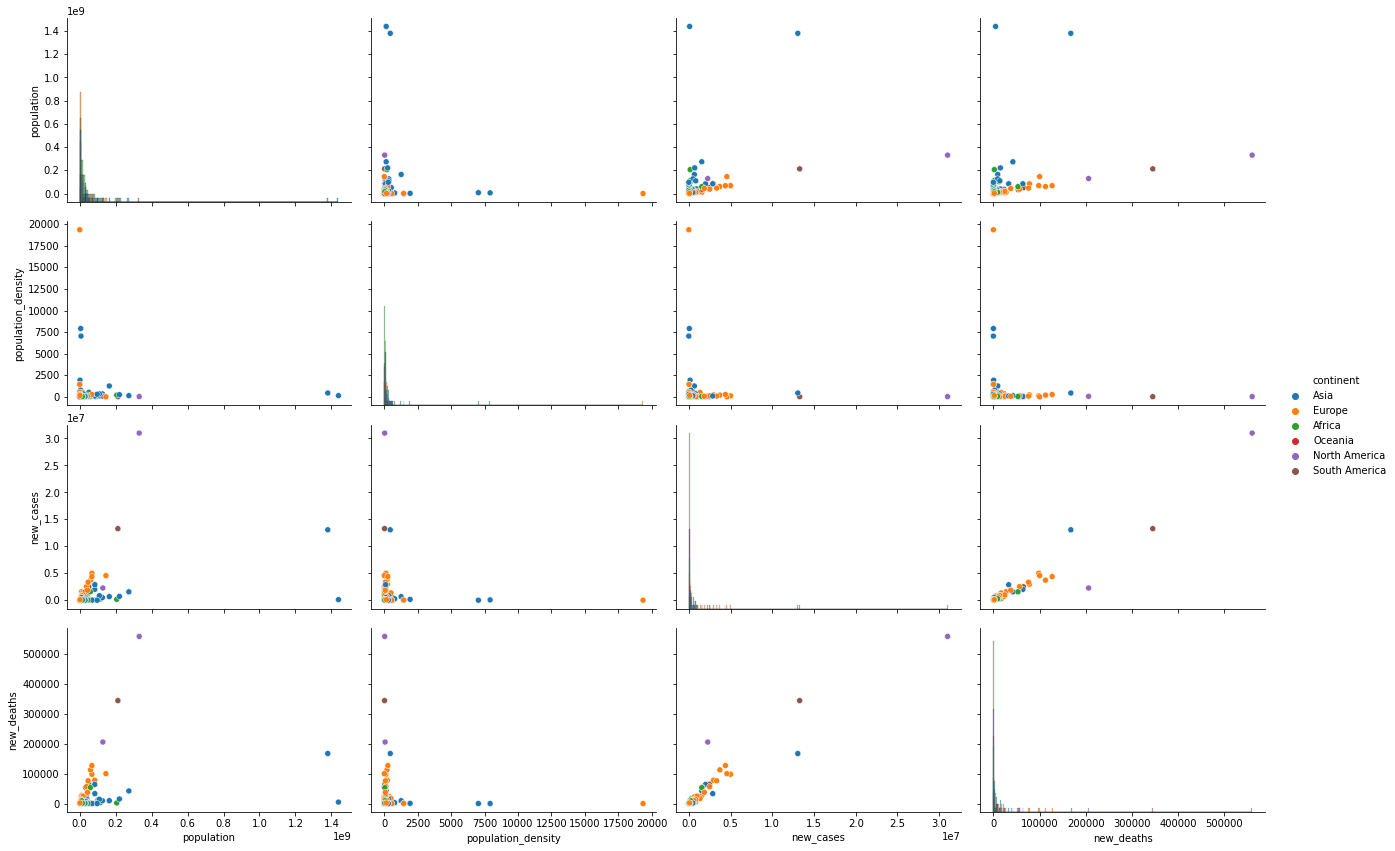

In [219]:
sns.pairplot(df_country[['continent','iso_code','population','population_density','new_cases','new_deaths']], hue='continent', height=3, aspect=1, diag_kind="hist")

## 1. How is the spread of the coronavirus throughout the world ? Which continent had the highest number of cases and deaths ? 

- The continent with the highest number of cases is Europe even Asia having the highest population.
- Comparing the cases with deaths we can say that Europe and North America have the highest number of cases and deaths. 


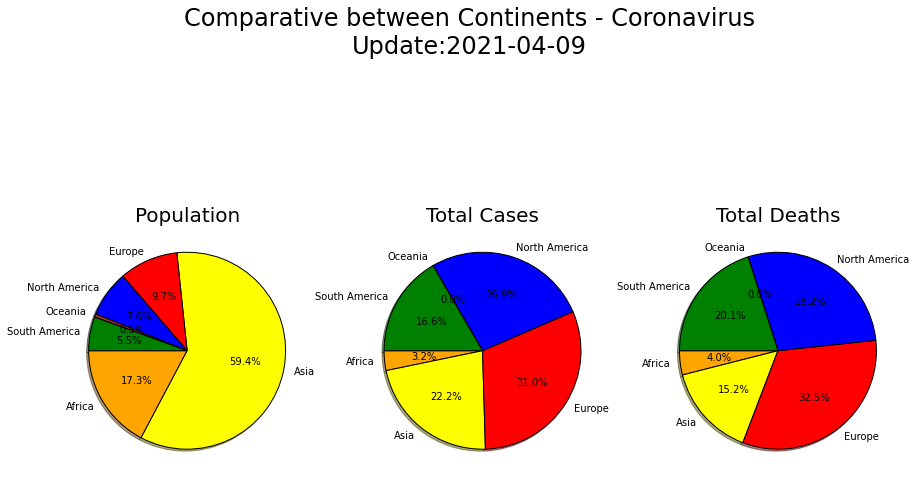

In [195]:
labels = df_virus_groupby_continent.index
cases  = df_virus_groupby_continent['new_cases']
deaths = df_virus_groupby_continent['new_deaths']
pop = df_continent_info['Total Population']
colors = ['orange','yellow','red','blue','brown','green']

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,10))
plt.suptitle(f'Comparative between Continents - Coronavirus\nUpdate:{update}',fontsize=24)

ax1.pie(pop, labels=labels, autopct='%1.1f%%',shadow=True, startangle=180, colors=colors, wedgeprops={'edgecolor':'black'})
ax1.set_title('Population',fontsize=20)

ax2.pie(cases, labels=labels, autopct='%1.1f%%',shadow=True, startangle=180, colors=colors, wedgeprops={'edgecolor':'black'})
ax2.set_title('Total Cases',fontsize=20)

ax3.pie(deaths, labels=labels, autopct='%1.1f%%',shadow=True, startangle=180, colors=colors, wedgeprops={'edgecolor':'black'})
ax3.set_title('Total Deaths',fontsize=20)

plt.show()

## 2. Is there a correlation between the wealth of a nation and the Coronavirus cases? Or a correlation between population density and the Coronavirus cases?

- It is not clear that it has any correlation between the wealth and density of the countries compare to cases of coronavirus

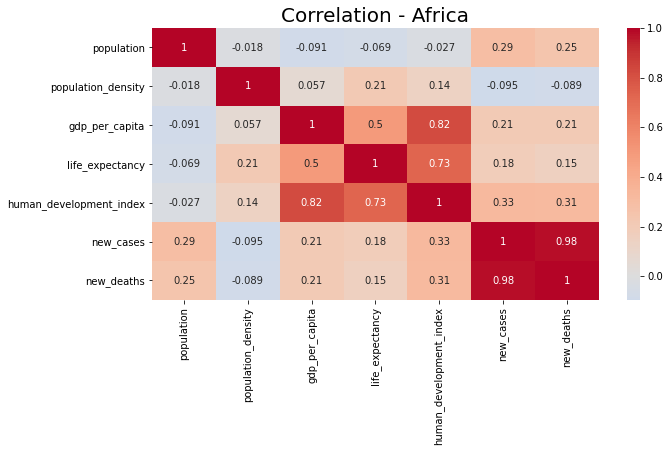

In [196]:
# select the columns that shows on correlation - Let´s check Africa
cont = 'Africa'
plt.figure(figsize=(10,5))
plt.title(f'Correlation - {cont}',fontsize=20)
df_corr = df_country [df_country['continent'] == cont]
sns.heatmap(df_corr[['population','population_density','gdp_per_capita','life_expectancy','human_development_index','new_cases','new_deaths']].corr(), cmap="coolwarm", center=0, annot=True)
plt.show()

## 3. What is the mean cases between the continents ?

- We can check how many countries have between 0 and 100,000 cases, between 100,001 and 200,000 ...
- Analysing the histogram the majorities of the countries are on the first group, in other words, more than 150 countries of all countries infected have between 1 and 400,000 cases
- The mean cases of cases is approximately 550,000

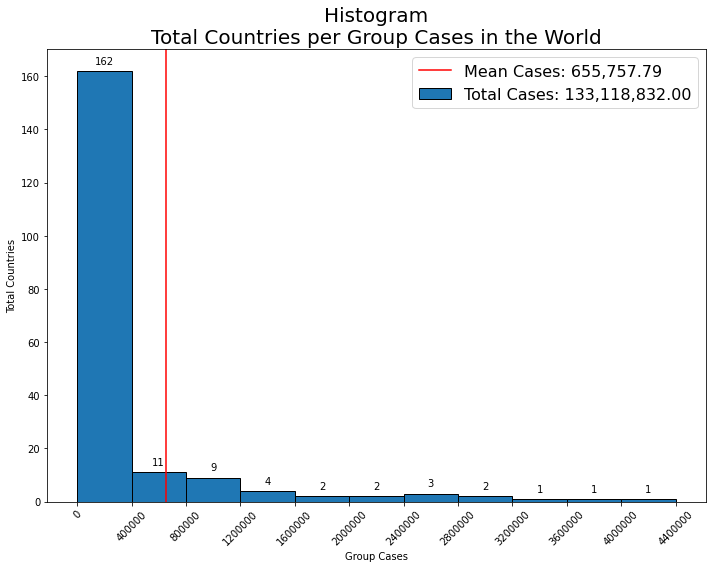

In [197]:
cases = df_country['new_cases']
bins = [0,400_000,800_000,1_200_000,1_600_000,2_000_000,2_400_000,2_800_000,3_200_000,3_600_000,4_000_000,4_400_000]
mean_cases =  df_country['new_cases'].mean()

fig, ax = plt.subplots(figsize=(10, 8))

plt.ticklabel_format(useOffset=False, style='plain')
plt.hist(cases, bins=bins, edgecolor='black',label=f'Total Cases: {df_country["new_cases"].sum():,.2f}')
plt.axvline(mean_cases,color='red',label=f'Mean Cases: {mean_cases:,.2f}')

plt.title(f'Histogram\nTotal Countries per Group Cases in the World',fontsize=20)
plt.xlabel('Group Cases')
plt.ylabel('Total Countries')

# plot values on top of bars
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.xticks(bins,rotation=45)

plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

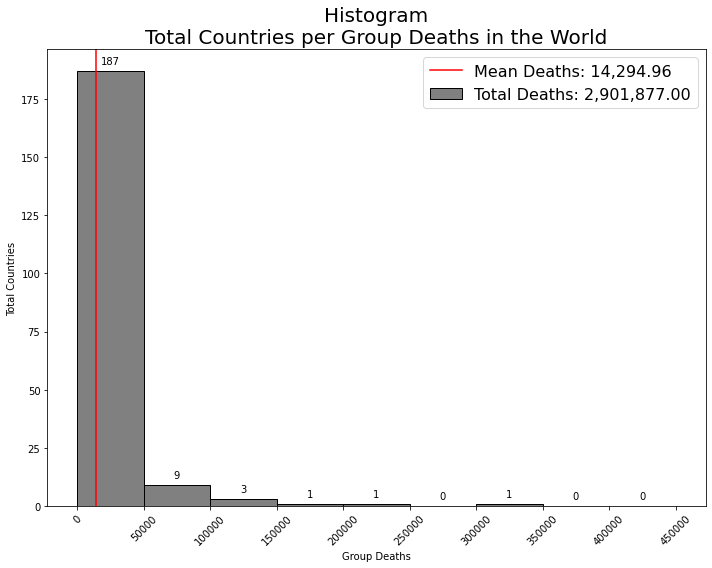

In [198]:
deaths = df_country['new_deaths']
bins = [0, 50_000, 100_000,150_000, 200_000, 250_000, 300_000, 350_000, 400_000, 450_000]
mean_deaths =  df_country['new_deaths'].mean()

fig, ax = plt.subplots(figsize=(10, 8))
plt.ticklabel_format(useOffset=False, style='plain')
plt.hist(deaths, bins=bins, edgecolor='black',color='gray',label=f'Total Deaths: {df_country["new_deaths"].sum():,.2f}')
plt.axvline(mean_deaths,color='red',label=f'Mean Deaths: {mean_deaths:,.2f}')

plt.title(f'Histogram\nTotal Countries per Group Deaths in the World',fontsize=20)
plt.xlabel('Group Deaths')
plt.ylabel('Total Countries')

# plot values on top of bars
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    
plt.xticks(bins,rotation=45)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

In [44]:
df_country["new_deaths"][df_country['location'].isin(['USA','Brazil','India'])].sum()

1072783.0

## 4. Which countries are now the top 10 with the highest number of cases ? What is the mean cases for each of the top 10 countries ?

- Lets check the 10 countries with the highest cases of coronavirus

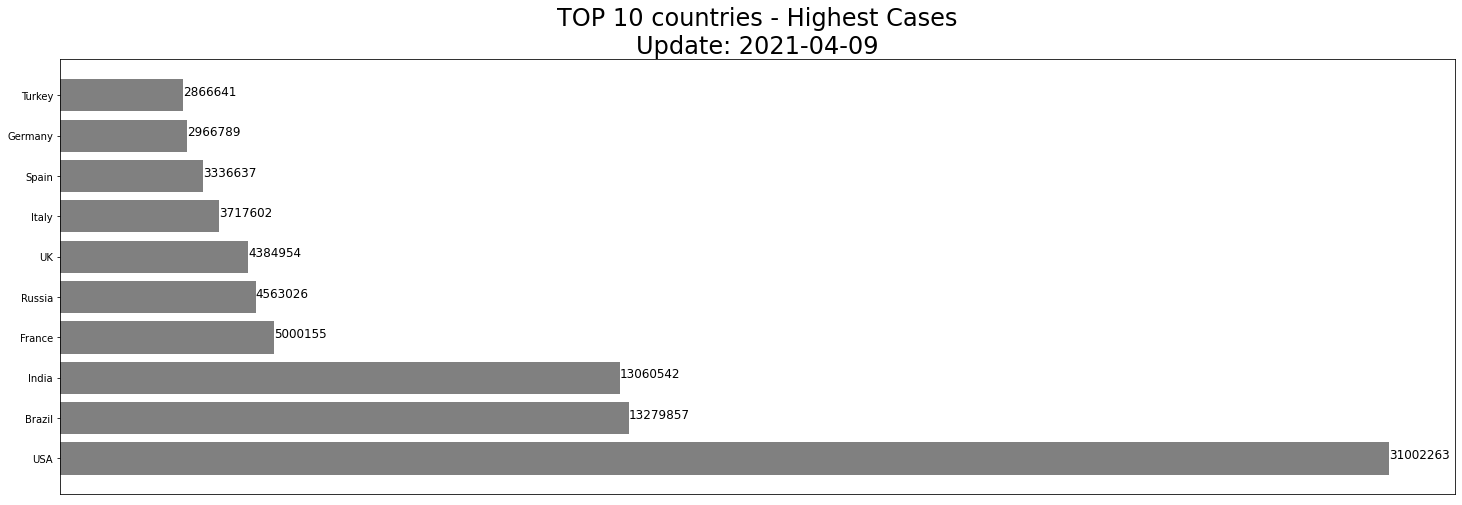

In [199]:
# created a df with the 10 top countries cases
df_top_10_d = df_country.sort_values(by='new_cases',ascending=False).head(10)
x = df_top_10_d['location']
y = df_top_10_d['new_cases']


plt.figure(figsize=(25, 8))

# remove y ticks
plt.xticks([])

plt.title(f'TOP 10 countries - Highest Cases\nUpdate: {update}', fontsize=24)
plt.barh(x,y,color='gray')

for i, v in enumerate(y):
    plt.text(v, i, str(int(v)),fontsize=12)
plt.show()

## 5. Can we say that some countries have the second, third ... wave ?
 
- We can check how many cases since the beginning of pandemic per country
- In this graph we can see clearly if the country had or not the second wave 
- Take a look on top 5 as United States, India, Brazil, Russia, UK...
- Another point to investigate is why some countries had the second, third... wave ?
- Is the lockdown responsable for the drop down cases ?


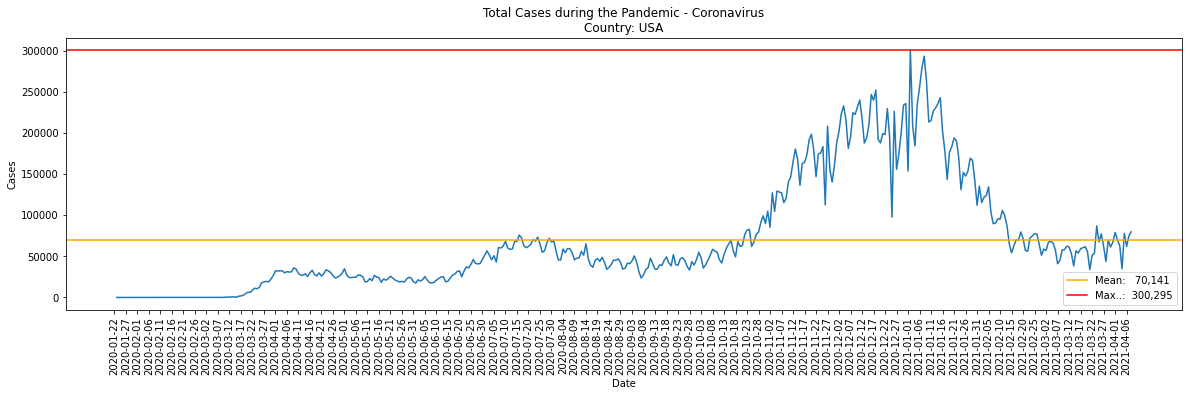

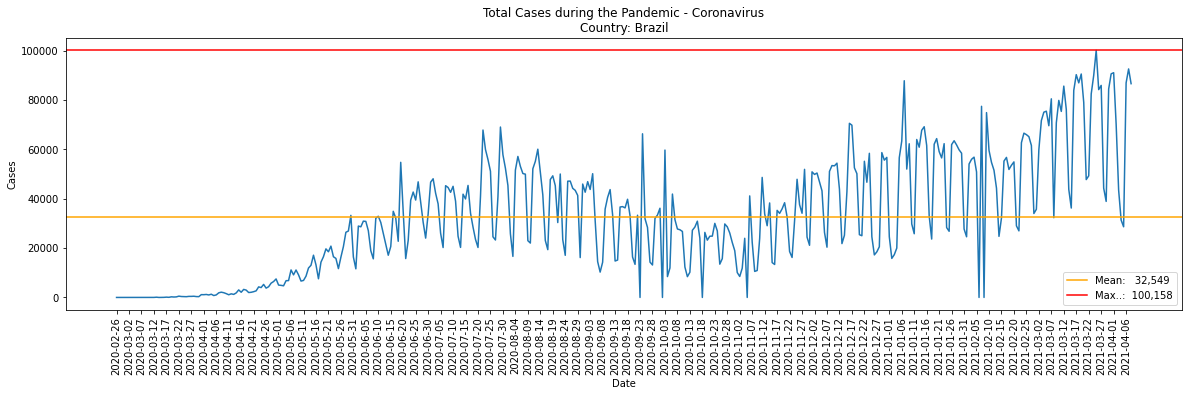

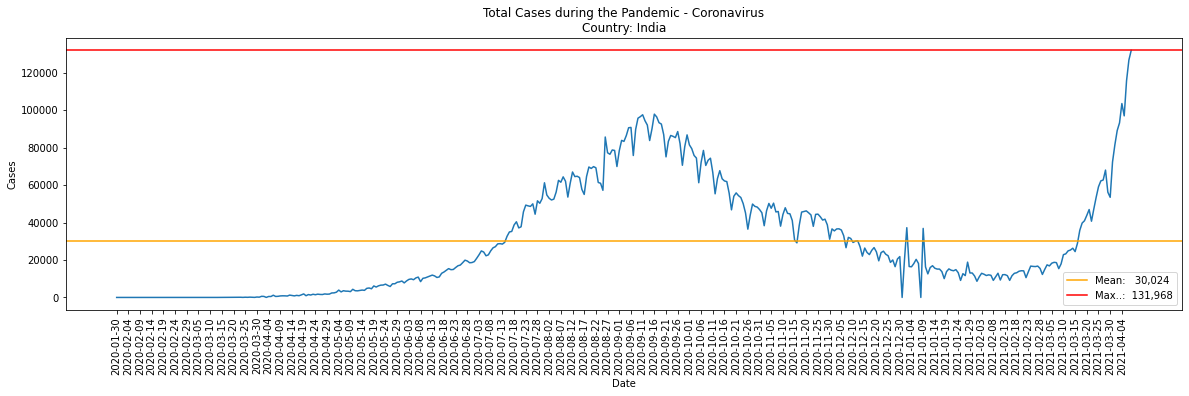

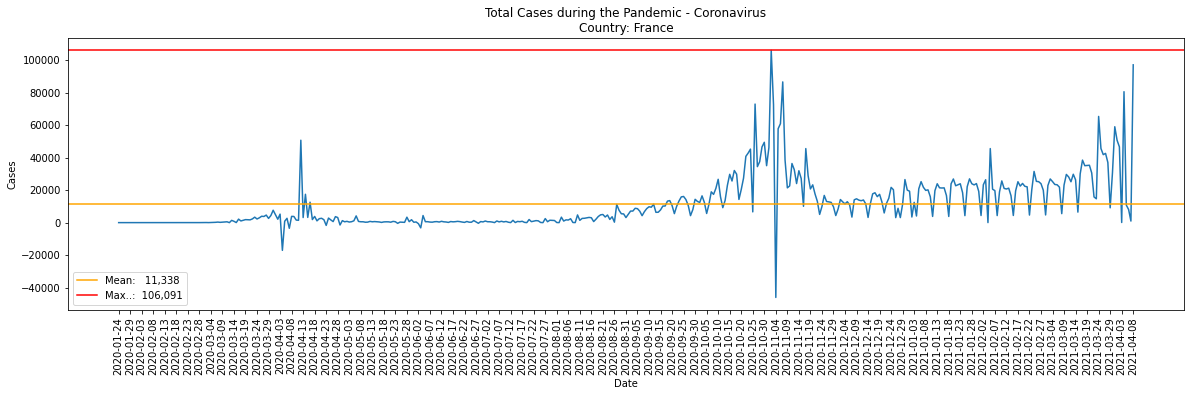

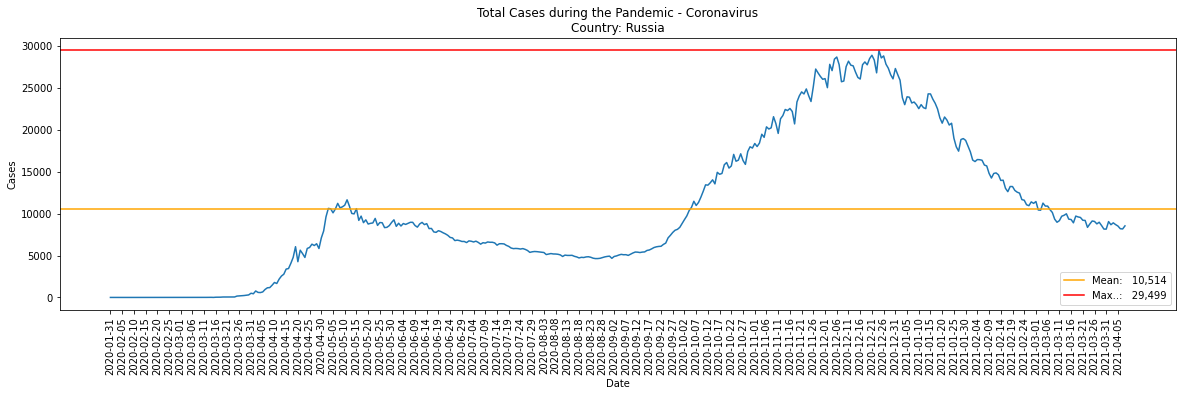

In [200]:
# Let´s check the top 5 countries with highest number of cases
country_list = df_top_10_d['location'].head(5)

for c in country_list:
   
    c = c.strip()

    x = df_virus['date'][df_virus['location'] == c]
    y = df_virus['new_cases'][df_virus['location'] == c]

    mean_country = df_virus['new_cases'][df_virus['location'] == c].mean()
    max_country  = df_virus['new_cases'][df_virus['location'] == c].max()

    plt.figure(figsize=(20,5))
    plt.title(f'Total Cases during the Pandemic - Coronavirus\nCountry: {c}')
    plt.plot(x,y)

    # plot the mean
    plt.axhline(mean_country,color='orange',label=f'Mean: {mean_country:8,.0f}')

    # plot the max
    plt.axhline(max_country,color='red',label=f'Max..: {max_country:8,.0f}')

    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.legend(loc='best')
    plt.xticks(ticks=x[::5], rotation=90)
    plt.show()       

## 6. Is there a difference in the spread of Coronavirus cases if the country is an isle ?

- When we observe some countries per continent almost all isle had their peak between December and January
- Singapore is a good example of country that is managing to contain the virus

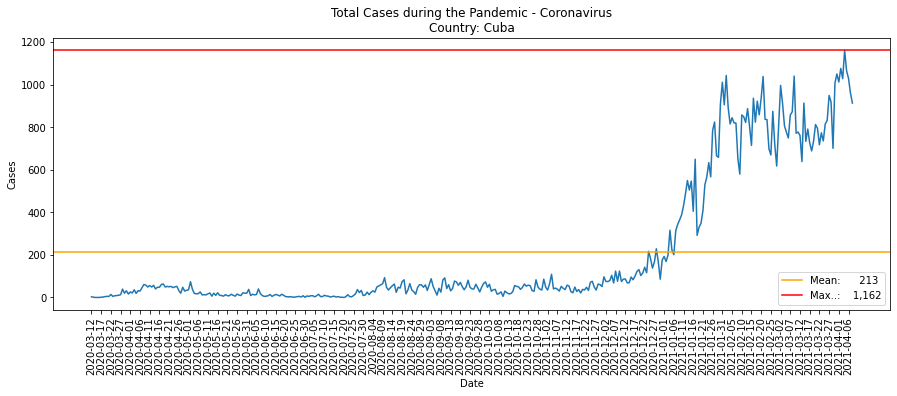

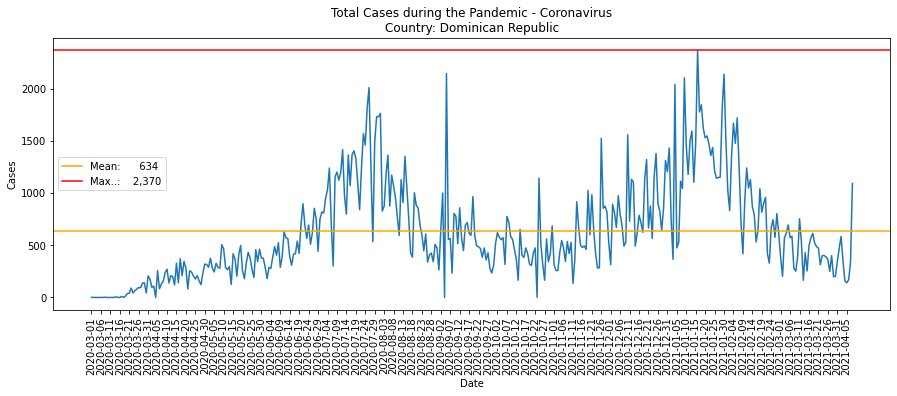

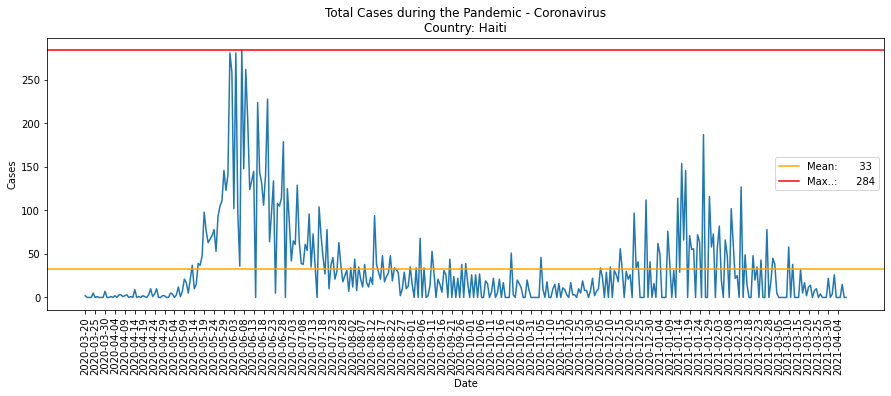

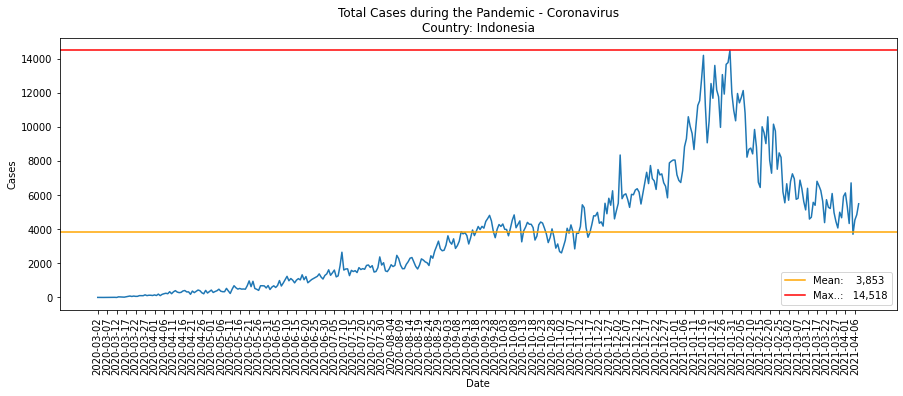

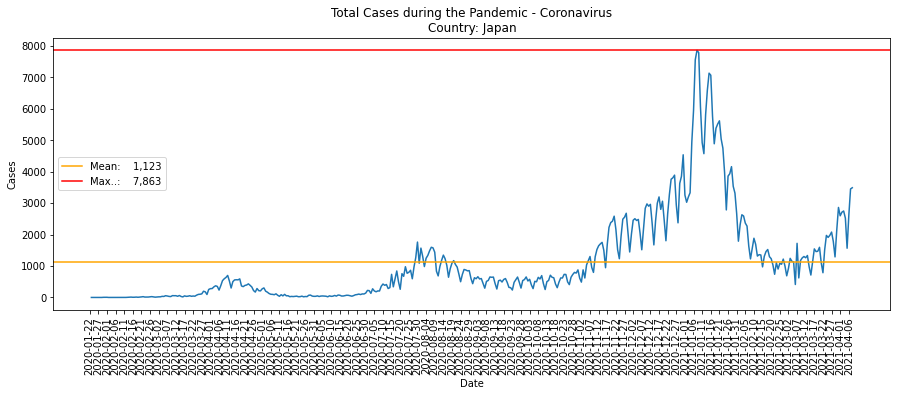

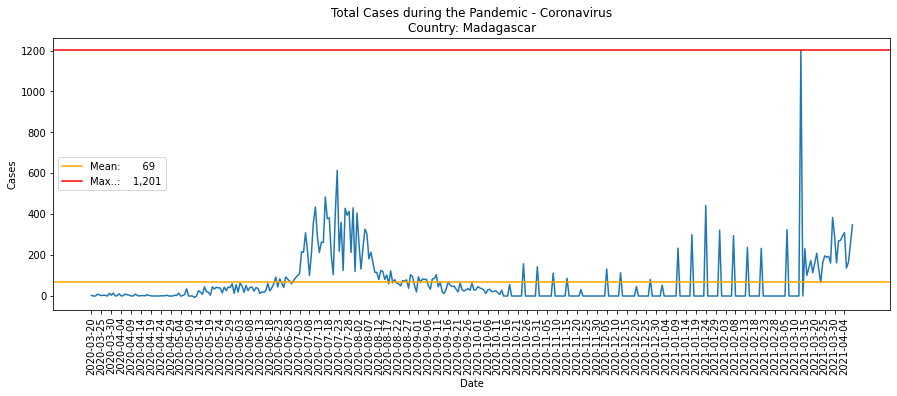

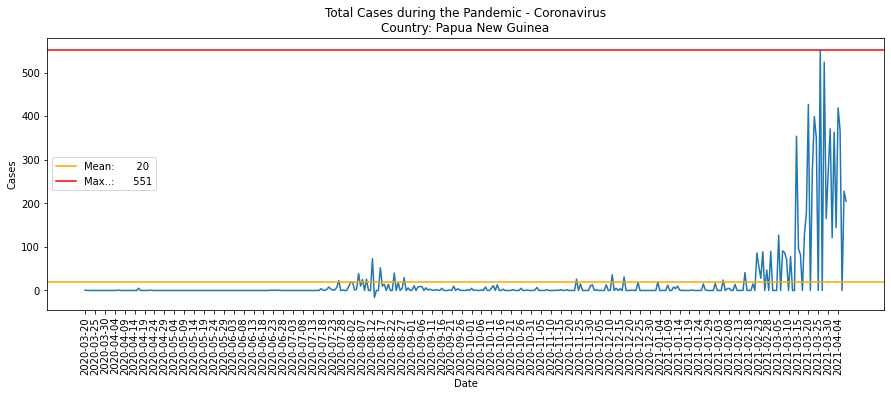

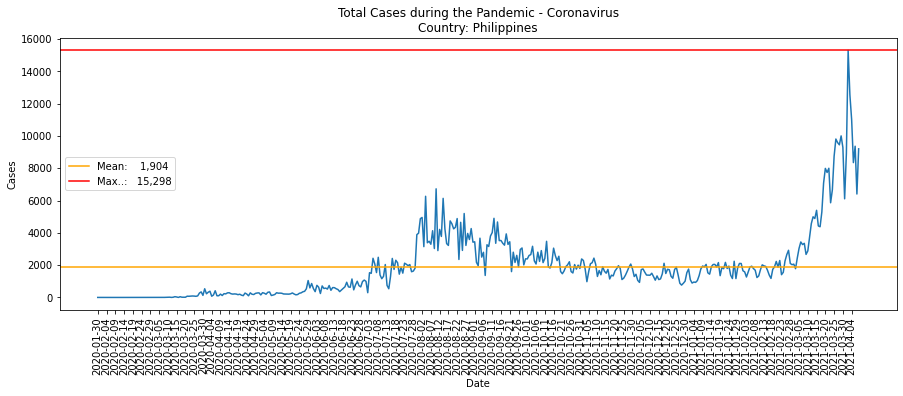

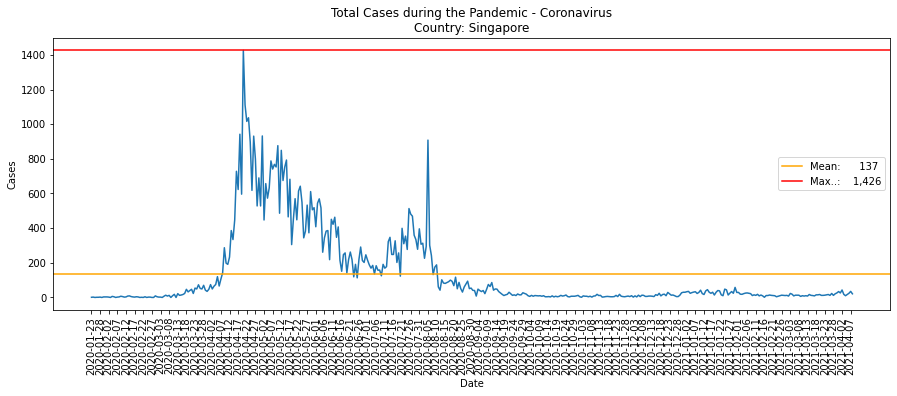

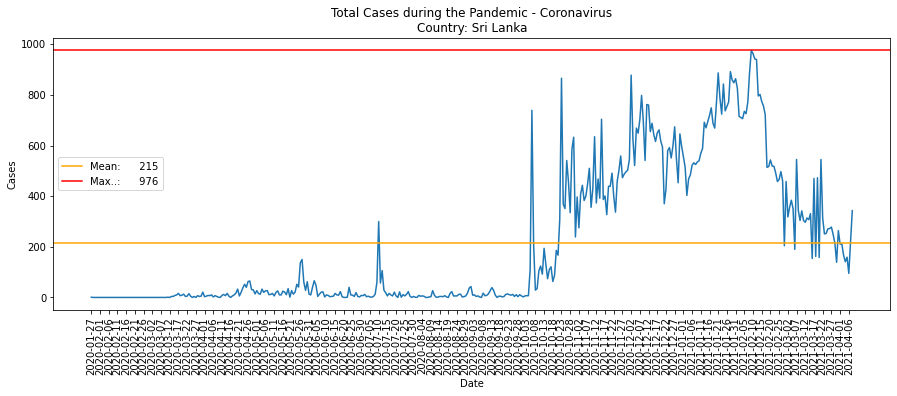

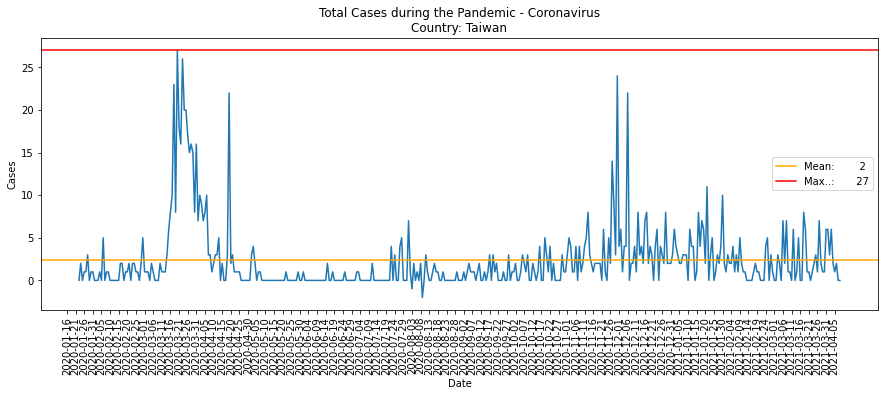

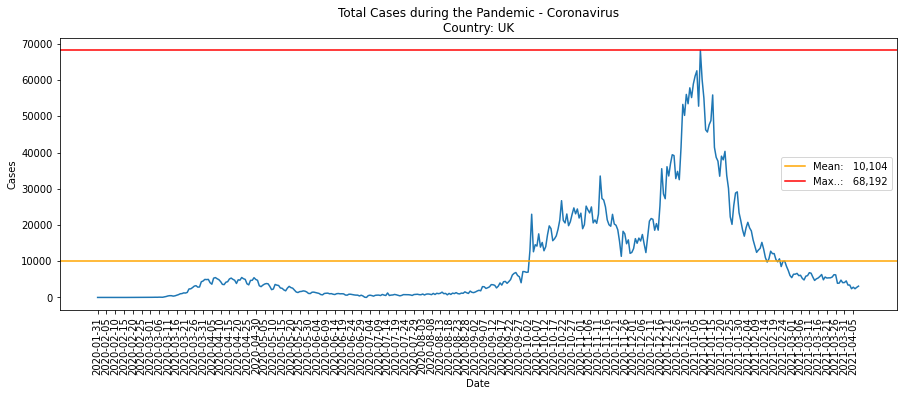

In [201]:
# Let´s get all countries that are considered isle
country_isle = df_country['location'][(df_country['isle'] == 'Y') & (df_country['population'] > 5_000_000) ]

for c in country_isle:
   
    c = c.strip()

    x = df_virus['date'][df_virus['location'] == c]
    y = df_virus['new_cases'][df_virus['location'] == c]

    mean_country = df_virus['new_cases'][df_virus['location'] == c].mean()
    max_country  = df_virus['new_cases'][df_virus['location'] == c].max()

    plt.figure(figsize=(15,5))
    plt.title(f'Total Cases during the Pandemic - Coronavirus\nCountry: {c}')
    plt.plot(x,y)

    # plot the mean
    plt.axhline(mean_country,color='orange',label=f'Mean: {mean_country:8,.0f}')

    # plot the max
    plt.axhline(max_country,color='red',label=f'Max..: {max_country:8,.0f}')

    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.legend(loc='best')
    plt.xticks(ticks=x[::5], rotation=90)
    plt.show()       

# 7. Is there any country without cases of coronavirus ?

In [202]:
df_free_country = df_country[~df_country['location'].isin(df_virus['location'].unique())]
df_free_continent = df_free_country.groupby('continent').count()['location']

print(f"We have {len(df_free_country)} countries with NO cases of coronavirus reported where \
{len(df_free_country[df_free_country['isle']=='Y'])} are isles.\nSource: https://ourworldindata.org/coronavirus")

df_free_country[['iso_code','location','continent','isle']].sort_values(by='continent')
df_free_country

We have 33 countries with NO cases of coronavirus reported where 11 are isles.
Source: https://ourworldindata.org/coronavirus


,iso_code,location,latitude,longitude,continent,isle,population,population_density,gdp_per_capita,life_expectancy,human_development_index,new_cases,new_deaths
3,ASM,American Samoa,-14.27,-170.13,Oceania,Y,nan,nan,nan,nan,nan,nan,nan
10,ABW,Aruba,12.52,-69.97,North America,N,nan,nan,nan,nan,nan,nan,nan
28,VGB,British Virgin Islands,18.42,-64.64,North America,N,nan,nan,nan,nan,nan,nan,nan
38,ANT,Caribbean Netherlands,12.23,-69.06,North America,N,nan,nan,nan,nan,nan,nan,nan
41,CHA,Channel Islands,49.37,-2.36,Europe,N,nan,nan,nan,nan,nan,nan,nan
47,COK,Cook Islands,-21.24,-159.78,Oceania,Y,nan,nan,nan,nan,nan,nan,nan
51,CUW,Curaçao,12.21,-68.95,North America,N,nan,nan,nan,nan,nan,nan,nan
72,GUF,French Guiana,3.93,-53.13,South America,N,nan,nan,nan,nan,nan,nan,nan
73,PYF,French Polynesia,-17.68,-149.41,Oceania,N,nan,nan,nan,nan,nan,nan,nan
83,GLP,Guadeloupe,17.00,-62.07,North America,N,nan,nan,nan,nan,nan,nan,nan


# 8. Is there any country that reached 1 Million of cases ? How many days to reach it ?

- Let´s check how many days each country reach a group of cases, for example, how many days each country reach 100 cases, 1000 cases, 10000 cases...

In [203]:
df_group = pd.DataFrame({'location': [],'100':[],'1_000':[],'10_000':[],'100_000':[],'1_000_000':[]})

for country in df_virus['location'].unique():
    list_cases =[(days, cum_cases) for days, cum_cases in enumerate(df_virus['new_cases'][df_virus['location']==country].cumsum())]
    d_100 = 0
    d_1000 = 0 
    d_10000 = 0 
    d_100000 = 0 
    d_1000000 = 0
    for days, cum_cases in list_cases:
        if cum_cases >= 1_000_000 and d_1000000 == 0:
            d_1000000 = days
        elif cum_cases >= 100_000 and d_100000 == 0:
            d_100000 = days       
        elif cum_cases >= 10_000 and d_10000 == 0:
            d_10000 = days
        elif cum_cases >= 1_000 and d_1000 == 0:
            d_1000 = days              
        elif cum_cases >= 100 and d_100 == 0:
            d_100 = days
    
    df_group = df_group.append({'location':country,'100':d_100,'1_000':d_1000,'10_000':d_10000,'100_000':d_100000,'1_000_000':d_1000000},ignore_index=True)

df_group.set_index('location',inplace=True)

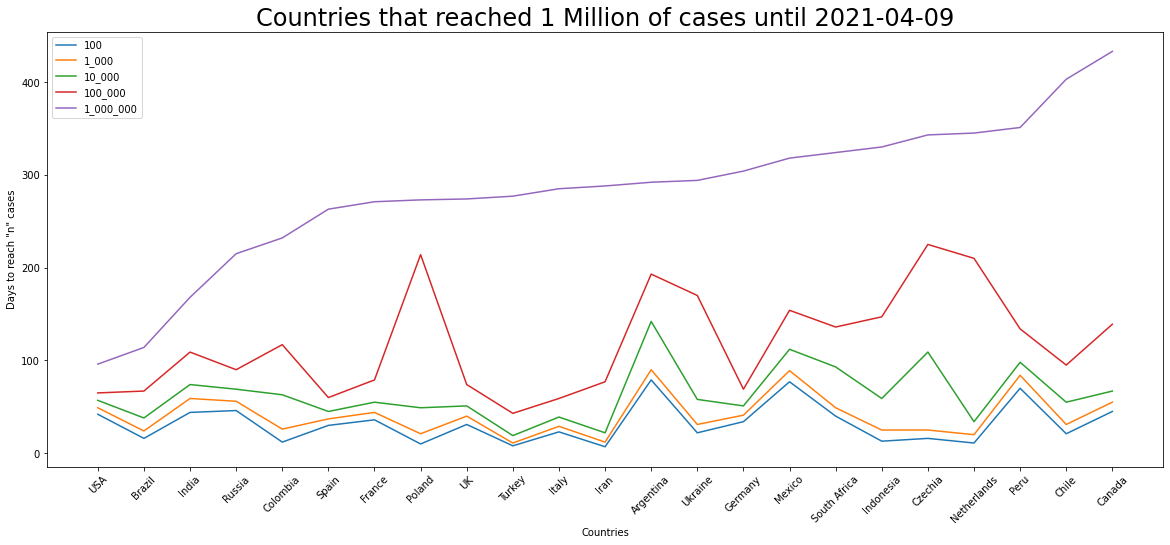

In [204]:
# Checking countries that already reached 1 Million of cases
df_group_million = df_group[df_group['1_000_000'] > 0].sort_values(by='1_000_000')

plt.figure(figsize=(20,8))
plt.title(f'Countries that reached 1 Million of cases until {update}',fontsize = 24)
x = df_group_million.index
y = df_group_million[['100','1_000','10_000','100_000','1_000_000']]

plt.plot(x,y)
plt.xlabel('Countries')
plt.ylabel('Days to reach "n" cases')
plt.legend(['100','1_000','10_000','100_000','1_000_000'])

plt.xticks(rotation=45)
plt.show()


In [205]:
df_group[df_group['1_000_000'] > 0].sort_values(by='1_000_000').T

location,USA,Brazil,India,Russia,Colombia,Spain,France,Poland,UK,Turkey,...,Ukraine,Germany,Mexico,South Africa,Indonesia,Czechia,Netherlands,Peru,Chile,Canada
100,42.00,16.00,44.00,46.00,12.00,30.00,36.00,10.00,31.00,8.00,...,22.00,34.00,77.00,40.00,13.00,16.00,11.00,70.00,21.00,45.00
1_000,49.00,24.00,59.00,56.00,26.00,37.00,44.00,21.00,40.00,11.00,...,31.00,41.00,89.00,49.00,25.00,25.00,20.00,84.00,31.00,55.00
10_000,57.00,38.00,74.00,69.00,63.00,45.00,55.00,49.00,51.00,19.00,...,58.00,51.00,112.00,93.00,59.00,109.00,34.00,98.00,55.00,67.00
100_000,65.00,67.00,109.00,90.00,117.00,60.00,79.00,214.00,74.00,43.00,...,170.00,69.00,154.00,136.00,147.00,225.00,210.00,134.00,95.00,139.00
1_000_000,96.00,114.00,168.00,215.00,232.00,263.00,271.00,273.00,274.00,277.00,...,294.00,304.00,318.00,324.00,330.00,343.00,345.00,351.00,403.00,433.00


# Step 6 - Report
Information below was generated with the information obtained through the ourworldindata website until the date: March 03, 2021.

The Coronavirus first appeared in China in December 2019 and has since then rapidly spread throughout the world. The world is still trying to understand the virus, its origin and its effects. The graphs and daily cases were extracted from the website ourworldindata that has information from 203 countries. Some countries like Puerto Rico, Guam, United States Virgin Islands, Northern Mariana Islands and American Samoa have their cases computed into USA country and for this reason they do not have any cases individually. Some isolated isles in Oceania does not have any cases like Palau, Cook Islands, Kiribati, Nauru, Nieu...

Observing the graphs above, we can notice that Europe is the most affected continent by the coronavirus, even Asia having the highest population and the first continent infected.
Analysing if it has any correlation between number of cases and population, density, gdp or life expectancy we cannot noticed any link between them.

When we check the number of cases per countries during the pandemic, from 203 countries analysed: The total of cases registered is more than 113 Million where the mean of cases is 560 thousand even 164 countries having between 0 and 400 thousand cases. The mean is high because of highest numbers of cases specially in USA, Brazil and India, that together summarize almost 51 Million of cases. The total of deaths registered is 2.5 Million where the mean of deaths is 12 thousand. USA, Brazil and India together summarize more than 900 thousand of deaths.
Almost 1 year since the beginning of pandemic and we can observe on the top 10 countries with the highest number of cases that some countries like USA, India, Brazil, Russia, Germany, UK had the peak of daily cases between December and January.

When we compare the top 3, Brazil since May is maintaining the number of daily cases above the mean of cases. India reached the peak in September and now is decreasing the number of cases. USA reached the peak of daily cases in January.

We can see as well, that 21 countries, until the last update, reached 1 Million of cases. Within 96 days since the first case, USA reached 1 Million of cases and Netherlands reached with 345 days.


# Step 7 - Conclusion
The vaccine is ready!Now the challenge is to make these vaccines available to people around the world.
The next step is observe how many days or months the cases will take to reduce and if the vaccine will be effective against the new coronavirus variance.